
## TP 3 : Sods Shock Tube.

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Pour ce 3ème travail personnel nous allons nous intéresser au problème du tube à chocs. 

Brièvement, il s'agit d'un tube contenant un gaz et séparé en 2 régions par un diaphragme (une membrane) infiniment mince. Le gaz contenu dans ces deux régions étant initialement à des pressions différentes, la rupture instantanée du diaphragme aura pour conséquence de généré une onde de choc (à 1 dimension dans notre cas) à l'intérieur du tube. 

L'objectif principale de ce travail personnel est alors de calculer la pression, la densité et la vitesse du gaz compressible au travers du tube à chocs à un instant qui succède la rupture du diaphragme. Pour se faire, nous utiliserons la méthode de Richtmyer introduite dans la partie théorique de l'énoncé de ce travail personnel. 

Le second objectif de ce travail sera alors de voir si la méthode de Richtmyer tient, ou non, compte du choc créer en $x = 0$ m.

---
##### 1. Rappel & développement théorique:

---

#### 1.1 Les équations d'Euler.
---

Comme annoncé dans l'énoncé du problème, les équations d'Euler gouvernent le mouvement d'un fluide non-visqueux. Par conséquent elles vont nous permettrent de décrire l'écoullement à 1 dimension du gaz dans le tube à chocs lorsque le diaphragme est rompu.

Les équations d'Euler sont ainsi constituées des équations suivantes :

$$
\left\{
    \begin{array}{lll}
        &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 & \mbox{(conservation de la masse)}\\
        &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 & \mbox{(conservation de $\overline{\mathbf{p}}$)}\\
        &\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)= 0 & \mbox{(conservation de l'énergie)}
    \end{array}
\right.
$$

où 

$$
    \begin{array}{ll}
        \overline{\mathbf{p}} \mbox{, est l'impulsion (la quantité de mouvement)}\\
        e_T = e+u^2/2 \mbox{, est l'énergie totale par unité de masse}\\
        \rho \mbox{, est la densité du fluide}\\
        u \mbox{, est la vitesse du fluide}\\
        p \mbox{, est la pression du fluide}\\
    \end{array}
$$

Les équations d'Euler, sous la forme conservative (fournissant des résultats plus précis), peuvent alors être écritent sous forme vectorielle comme suit :


\begin{equation}
\frac{\partial }{\partial t} \overline{\mathbf{u}} + \frac{\partial }{\partial x} \overline{\mathbf{f}} = 0
\end{equation}
avec $\overline{\mathbf{u}}$ le vecteur des variables conservées et $\overline{\mathbf{f}}$ le vecteur de flux, donnés par :

\begin{align}
\overline{\mathbf{u}} & = 
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]  &  
\overline{\mathbf{f}} & = 
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ 
\end{array} \right]
\end{align}

La manipulation de ces deux vecteurs ne nous posera pas de problème car nous avons déjà put nous familiariser avec lors de la 3ème leçon du premier module *Phugoid - Phugoid Full Model*.

Pour la suite, une 4ème équation est nécessaire. Ainsi, en introduisant l'équation d'état qu'est l'équation des gaz parfaits, nous obtenons l'équation pour la pression suivante :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}

où $\gamma^{(1)}$ vaudra dans notre cas $1.4$

En outre, en exprimant la pression en terme du vecteur des variables conservées $\overline{\mathbf{u}}$ :


\begin{align}
\overline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]  
→ p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)
\end{align}

et en remarquant que $\overline{\mathbf{f}}$ est une fonction de $\overline{\mathbf{u}}$ nous avons alors :


$$→ \overline{\mathbf{f}}(\overline{\mathbf{u}}) = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

qui est facilement résolvable.

___

###### [1] : Avec $\gamma =  \frac{c_p}{c_v}$, le rapport de la capacité calorifique à pression constante, $c_p$, par la capacité calorifique à volume constant, $c_v$.

---

#### 1.2 La méthode de Richtmyer.
---

Pour résoudre notre problème nous allons comme annoncé utiliser la méthode de Richtmyer. Cette nouvelle méthode est, comme pour la méthode de MacCormack que nous avons put apprendre dans la leçon 2 (*03-02 Convection Schemes*)de ce module, une méthode en deux étapes à savoir :

\begin{align}
\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \overline{\mathbf{u}}^n_{i+1} + \overline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \overline{\mathbf{f}}^n_{i+1} - \overline{\mathbf{f}}^n_i\right) \\
\overline{\mathbf{u}}^{n+1}_i &= \overline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\overline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \overline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}

Où la première de ces deux étapes applique un schéma de Lax-Friedrichs. En outre, cette première étape est comme un *prédicteur* de la solution tandis que la seconde est un *correcteur* qui applique une mise à jour Leapfrog". 

Ainsi, nous voyons clairement comment notre algorithme devra s'articuler. À partir des conditions initiales que l'on aura implémentées, un premier calcul du vecteur flux nous fournira une solution intermédiaire, 
$$\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$$
qui servira a son tour au calcul du vecteur flux, 
$$\overline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \overline{\mathbf{f}}\left(\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)$$
pour le correcteur. On obtiendra ainsi par itération sur le temps, l'évolution de notre système.

Passons sans plus tarder à l'écriture de nos codes.

---
##### 2. Un premier pas vers la résolution du problème du tube à chocs.

---

#### 2.1 Les conditions initiales (CI).

---
Comme à notre habitude, commençons par importer les librairies qui nous seront utiles pour la suite.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Il convient ensuite d'initialiser la discrétisation spatiale ainsi que l'ensemble des conditions initiales suivantes :

$$→ \underline{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$→ \underline{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

où $IC_L$ et $IC_R$ sont, respectivement, les conditions initiales à gauche et à droite de la membrane ($\underline{I}$nitial $\underline{C}$ondition at $\underline{L}$eft & $\underline{I}$nitial $\underline{C}$ondition at $\underline{R}$ight en anglais).

Remarque : les pressions utilisées sont exprimées en N plutôt que laissées en kN.

In [2]:
# On définit notre grille spatiale
nx = 81
x = numpy.linspace(-10,10,nx)

# Conditions initiales à gauche de la membrane
rho_L = 1
u_L   = 0
p_L   = 100000

# Conditions initiale à droite de la membrane
rho_R = .125
u_R   = 0
p_R   = 10000

Nous devons maintenant implémenter ces conditions initiales (CI) à notre système. Pour cela, nous nous inspirons de ce qui a été fait dans la leçon *3.1 Conservation Law* (entre autre) pour la fonction *rho_green_light*.

Nous créons ainsi 3 listes : une première pour nos valeurs de densité, une seconde pour celles de la vitesse et une dernière pour les pressions. Par le biais de ces listes, nos CI seront implémentées en fonction de la position dans le tube.

Enfin, il convient ensuite de distinguer la gauche de la droite du tube. En plaçant l'origine de notre axe x au milieux du tube nous avons immédiatemment que :

$$
x \in \left\{ 
    \begin{array}{}
         & [-10,0[ \mbox{ m} & → & nx\in[0,39]\\
         & [0,10[ \mbox{ m} & → & nx\in[40,80]
    \end{array}
\right.
$$

Ce qui nous donne bien 40 valeurs à gauche (le 0 étant également un point de notre grille d'espace) et 40 valeurs à droite.

Passons maintenant au codage de tout ceci.

In [3]:
x1 = numpy.ones(nx)
    
u1 = x1*rho_L                  # densité à gauche de la membrane
u1[int((nx-1)/2):] = rho_R     # densité à droite de la membrane

u2 = x1*u_L                    # vitesse à gauche de la membrane
u2[int((nx-1)/2):] = u_R       # vitesse à droite de la membrane

u3 = x1*p_L                    # pression à gauche de la membrane
u3[int((nx-1)/2):] = p_R       # pression à droite de la membrane

Nous pouvons alors réaliser un graphique de chacune de ces CI afin de vérifier qu'elles aient correctement été implémentées.

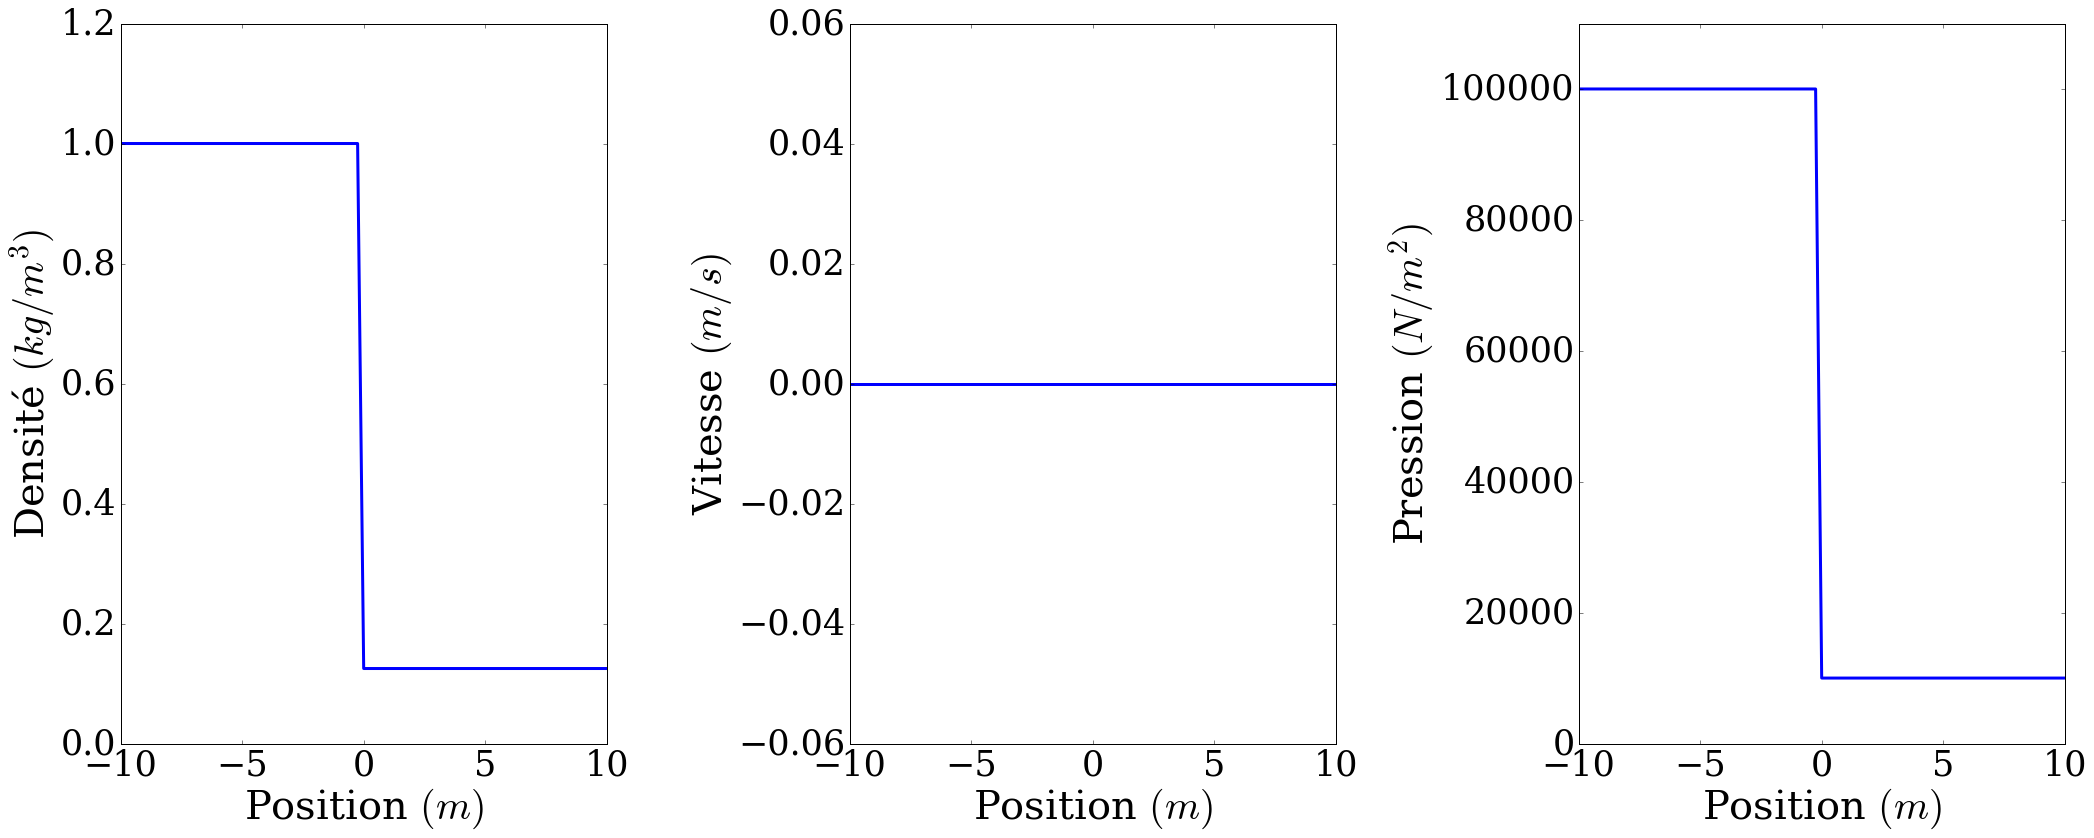

In [4]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, u1, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)


pyplot.subplot(1, 3, 2)
pyplot.plot(x, u2, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, u3, 'b-', lw=3)
pyplot.ylabel('Pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

D'où nous pouvons voir assez agréablement que nos conditions initiales ont correctement été implémentées. 

Pour la suite de la résolution de ce problème, nous allons définir deux fonctions.

___
#### 2.2 Introduction de nouvelles fonctions.

---

* La première de ces deux fonctions, la fonction $flux()$, va nous permettre de calculer le vecteur flux introduit dans le rappel théorique. Pour la réaliser, nous allons reprendre la même idée que celle utilisé lors de la leçons 3 du module 1 *Phugoid Full Model*, e.g. une fonction qui recoit différente variables, ici les trois composantes de taille nx du vecteur des variables conservées $\overline{\mathbf{u}}$, et qui calcul directement "dans le retour" les trois composantes, également de taille nx, du vecteur flux. 

* La seconde fonction que nous allons définir est celle qui va reprendre la méthode de Richtmyer. Notons tout d'abord que l'écriture de la méthode de Richtmyer sous la forme d'une fonction n'est pas essentielle pour ce tp étant donné que nous n'allons l'appeler qu'à une seule reprise pour la résolution du problème. Toutefois, comme il nous l'a été sugéré au cours des leçons de ce module, l'écriture d'une telle méthode sous la forme d'une fonction est un bon exercice en plus de pouvoir s'avéré utile pour une potentielle future utilisation.

Détaillons quelque peu cette deuxième fonction.

→ Dans un premier temps, nous donnons comme variables d'entrées le tableau de nos conditions initiales u, un temps de 
simulation (t_sim), un pas de temps (dt) et le pas d'espace (dx).

→ dans un second temps, nous calculons le nombre de point de la grille de temps (nt), et définissons 2 tableaux dont nous allons avoir besoin pour la résolution par la méthode de Richtmyer.
* Le premier tableau, u_n est un tableau qui contiendra l'ensemble de nos solutions à tout temps et pour tout x. Dès lors, nous aurons à créer un tableau (une sorte grosse matrice) de nt lignes et de 3 colonnes (e.g. une pour chacune des composantes du vecteur des variables conservées $\overline{\mathbf{u}}$) chacune de taille nx comme représenté sur la figure 1 ci-dessous. Pour se faire, nous allons utilisé la même idée que celle utilisée dans le travail personnel précédent (* Traffic Flow *). C'est-à-dire créer une boucle for pour les itérations sur le temps dans laquelle sera repris l'algorithme de la méthode Richtmyer et où, à la différence de ce qui à été fait précédemment, nous aurons besoin d'un indice supplémentaire pour différencier la colonne de la taille de celle-ci. Finalement, nous aurons également à spécifier que la première ligne de ce nouveau tableau n'est autre que celle constituée par nos conditions initiales.


![Image](./figures/matrice.png)


###### Figure 1. Représentation du tableau des solutions calculées par la méthode de Richtmyer. 

---

* Le second tableau que nous auront à définir, u_star, sera de dimensions identiques à u et servira d'étape intermédiaire pour la méthode de Richtmyer. Il contiendra donc l'ensemble des valeurs calculées par le prédicteur qui serviront au correcteur pour le calcul de la solution à la nt-ième itération. 

→ Ensuite, il nous faut fixer nos conditions aux bords (dans la boucle for afin qu'elles le soient à chaque itération de temps) qui ne sont autre que l'état initial de notre système en ces points. La raison de ces conditions aux bords vient du faite que l'on étudie notre système sur un temps relativement court ($t = 0,01s$) et qu'à priori, les gaz n'ont pas suffisamment voyagé que pour atteindre les bords.

→ Finalement, on extrait nos solutions pour la nt-ème étape dans un nouveau tableau de trois composantes de taille nx à savoir : un (définit en dehors de la fonction) et ce afin que les solutions puissent être utilisées par la suite.

Voici donc nos deux fonctions.

In [5]:
def flux(u):

    """Calcul du vecteur flux

    Paramètres
    ----------
    u[0]  : tableau de floats
        rho
    u[1]  : tableaux de floats
        rho*u
    u[2]  : tableau de floats
        rho*e_T
        
    Returns
    -------
        F : tableau
        tableau avec le vecteur flux pour tout point x
    """

    return numpy.array([u[1,:],
        (u[1,:]**2/u[0,:])+((gamma-1)*(u[2,:]-(.5*(u[1,:]**2/u[0,:])))),
        (u[2,:]+((gamma-1)*(u[2,:]-.5*(u[1,:]**2/u[0,:]))))*(u[1,:]/u[0,:])])

In [6]:
def Richtmyer(u, t_sim, dt, dx):
    """ Calcul la solution du problème du tube à choc par la méthode de Richtmyer
    
    Paramètres
    ----------
    u     : tableau de float
            rho, rho*u et rho*e_T
    nt     : int
            Nombre de pas de temps
    dt     : float
            Taille des pas de temps
    dx     : float
            réseau d'espace
    
    Returns
    -------
    u_n : tableau de floats
            rho, rho*u, rho*e_T après nt pas de temps à chaque point x
    """
   
    nt= int(t_sim/dt)+1

    u_n = numpy.zeros((nt,len(u),nx))
    u_n[:,:,:nx] = u.copy()
    u_star = numpy.empty_like(u)
    u_star = u.copy()

    for t in range(1,nt):
        F = flux(u)
        u_star[:,1:] = 0.5 * (u[:,1:]+u[:,:-1] - dt/dx * (F[:,1:] - F[:,:-1]))
        Fstar = flux(u_star)
        u_n[t,:,:-1] = u[:,:-1] - dt/dx * (Fstar[:,1:]-Fstar[:,:-1])
        
        # On impose nos conditions au bords du tube et on redéfinit nos "CI"
        u[:,0]  = u_n[0,:,0]
        u[:,-1] = u_n[0,:,-1]
        u = u_n[t,:,:].copy()
    
    #On extrait chaque composante de u_n et ce pour la dernière étape
    un[0] = u_n[nt-1,0,:]
    un[1] = u_n[nt-1,1,:]
    un[2] = u_n[nt-1,2,:]
    

---
##### 3. Résolution du problème du tube à choc :

---

Dans la section précédente, nous avons posé les conditions initiales de notre sytème, mais si on regarde nos équations, on remarque que les solutions pour la vitesse et la pression ne seront pas directement donné comme telle. On aura comme solution $\rho v$ et $\rho e_{T}$ donc nous devons modifier le code précédent en sachant que pour la vitesse, il suffit de multiplier par $\rho$. Par contre, pour calculer $\rho e_{T}$ à l'instant initiale, il faut repartir de l'expression de la pression rappelé çi-dessus en incluant les données de $v$ et $\rho$ à l'instant initial. Etant donné que la vitesse est nul à $t=0s$, on en déduit que : $\rho e_{T}(t=0) = \frac {P(t=0)}{(\gamma-1)}$

Pour finir, on va remplire le fameux tableau u avec nos variables. Ce dernier sera le point de départ de la résolution numérique de notre problème.

commentaire sur u3 qui n'est pas la pression mais ...

In [7]:
t_sim = 0.01
dx = 0.25
dt = 0.0002

gamma = 1.4

x1 = numpy.ones(nx)
    
u1 = x1*rho_L                        # densité à gauche du diaphragme
u1[int((nx-1)/2):] = rho_R           # densité à droite du diaphragme

u2 = x1*rho_L*u_L                    # vitesse*densité à gauche du diaphragme
u2[int((nx-1)/2):] = rho_R*u_R       # vitesse*densité à droite du diaphragme

u3 = x1*p_L/(gamma-1)                # rho*e_T à gauche du diaphragme
u3[int((nx-1)/2):] = p_R/(gamma-1)   # rho*e_T à droite du diaphragme

u = numpy.empty((3,nx))
u = numpy.array([u1,u2,u3])

In [8]:
un = numpy.empty((3,nx))

Richtmyer(u, t_sim, dt, dx)

rho = numpy.zeros(nx)
rho = un[0]
v   = numpy.zeros(nx)
v   = un[1]/un[0]
p   = numpy.zeros(nx)
p   = (gamma-1)*(un[2]-.5*un[1]**2/un[0])

In [9]:
# On récupère nos valeurs du tableau pour x=2.5m
L=12.5 # en m
indx = int(L/dx)

print("→ Densité à x = 2.5m à l'instant t = 0.01s :",round(rho[indx],2),"kg/m^3")
print("→ Vitesse à x = 2.5m à l'instant t = 0.01s :",round(v[indx],2),"m/s")
print("→ Pression à x = 2.5m à l'instant t = 0.01s :",round(p[indx],2),"N/m^2")

→ Densité à x = 2.5m à l'instant t = 0.01s : 0.37 kg/m^3
→ Vitesse à x = 2.5m à l'instant t = 0.01s : 292.61 m/s
→ Pression à x = 2.5m à l'instant t = 0.01s : 30250.89 N/m^2


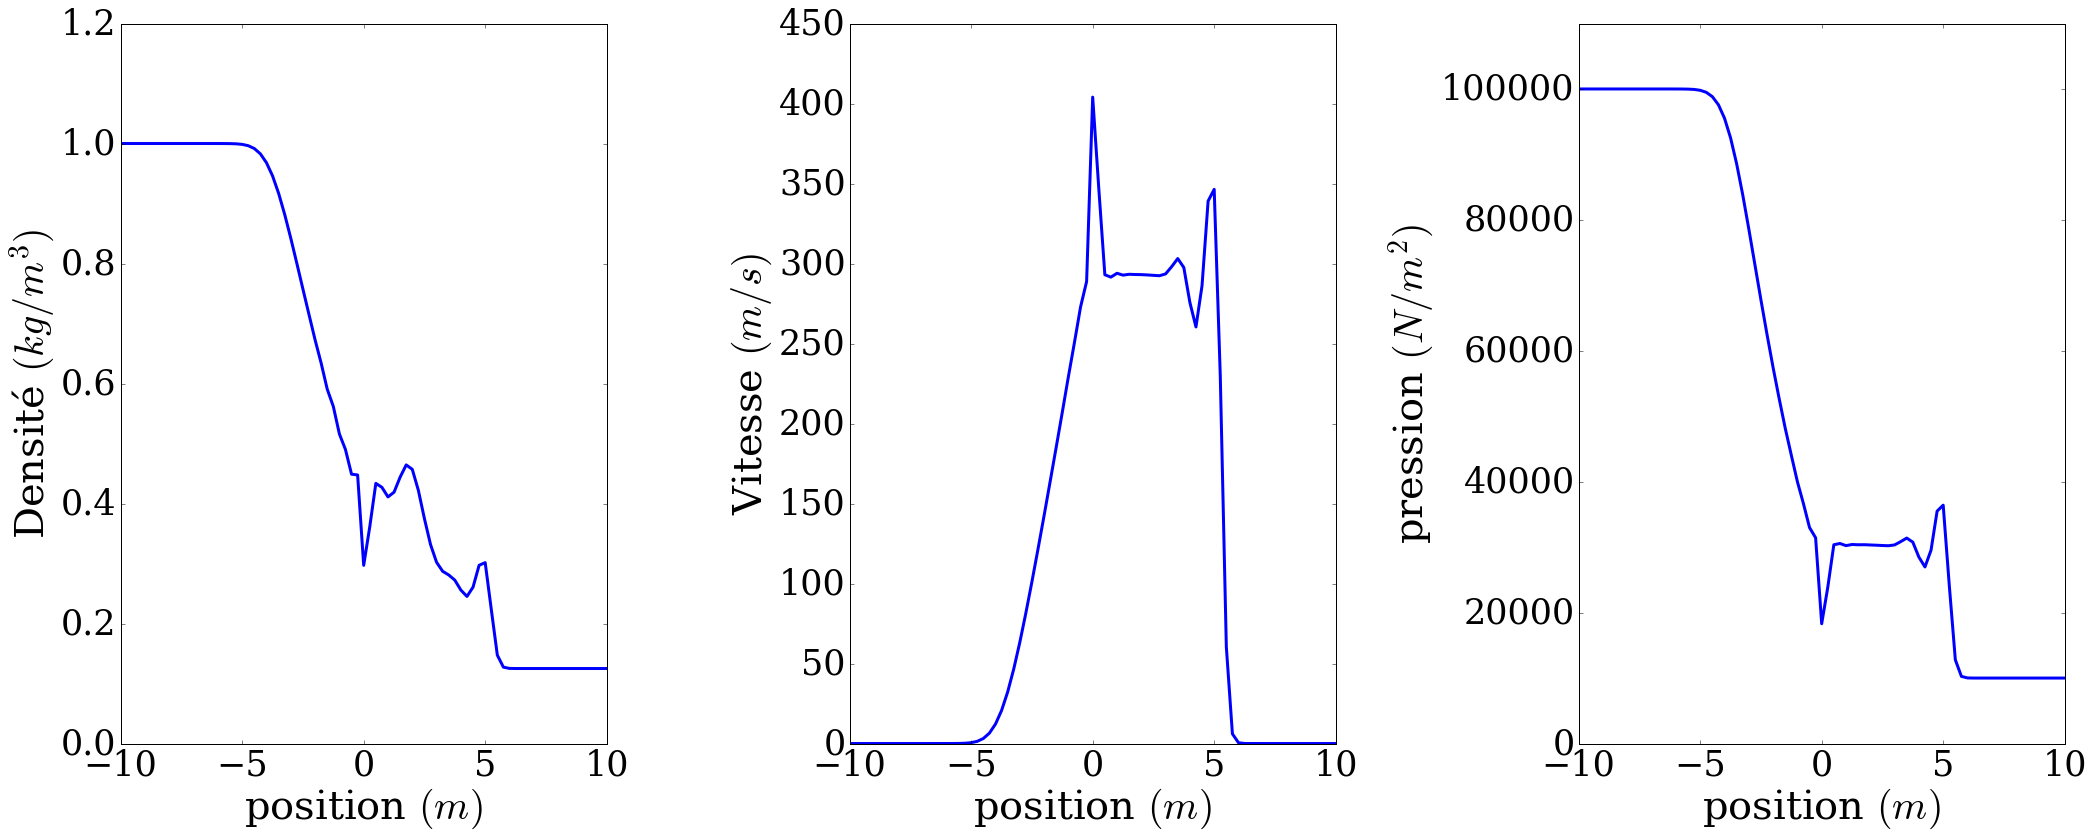

In [10]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, rho, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)


pyplot.subplot(1, 3, 2)
pyplot.plot(x, v, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, p, 'b-', lw=3)
pyplot.ylabel('pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

---
##### x. Sources:

---

[1] Cours de PHYS-F-201, 3e édition (2014-2015), *physique général III - Première partie : thermodynamique*, présenté par M. Nicolas Chamel.

---

###### The cell below loads the style of the notebook.

In [11]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())